# Numerical Data Analysis using Python

Analyzing data sets consisting of huge sets of numbers is where the whole profession of *Data Science* sprung to life. In that world, *Python* has become very popular, largely  because of the existence of several amazing packages of code that make the analytical process very easy. In this section, we will briefly look at three of these packages: *NumPy*, *SciPy*, and *MatPlotLib*.

## NumPy

*NumPy* (*Numerical Python*) is a package that lets you perform operations on sets of numbers using simple code. The make errors much less likely, and speeds up the programming process. *NumPy* knows about 1-D sets (simple arrays) and 2-D sets (matrices). Python already supported using such collections (lists, and lists of lists), but manipulating them involved setting up complicated loops that swept over these lists to perform operations. *NumPy* streamlines all of that into simple expressions.

Here is an example:

In [15]:
a = [1,2,3,4]
b = [2,4,6,8]

I want to add these two lists together. Python will do that!

In [3]:
a + b

[1, 2, 3, 4, 2, 4, 6, 8]

That is not what I had in mind. Python just mashed the two lists together into a longer one, What I really wanted was this:

In [16]:
result = []
for i in range(len(a)):
    result.append(a[i] + b[i])
    
result

[3, 6, 9, 12]

Now, let's let *NumPy* do this work:

In [17]:
import numpy as np
xa = np.array(a)
xb = np.array(b)
xc = xa + xb
xc

array([ 3,  6,  9, 12])

This example may not look that impressive, but once you get used to thinking about operations on lists of numbers using *NumPy*you never want to go back to the old ways!

## SciPy

The *SciPy* package is a collection of useful analytical functions that make analysis much easier. For example, we will be working on sets of numbers representing points on some curve, like lift coefficients as a function of angle of attack. The raw numbers are not that useful. What would really be useful is a mathematical function that represents this curve through these points so we can get values at any point we like. *SciPy* can do that using *spline interpolation*. Here is a look at that.

In [18]:
C_l = [
    (-2,0.06),
    (0,0.135),
    (2,0.20),
    (4,0.25),
    (6,0.30),
    (8,0.35),
    (10,0.395),
    (12,0.440)
]

These datapoints were pulled from Walter Erbach's *BASIC* program. They are in the form of a list of point pairs. 

The first thing we need to do is pull the points apart into two lists, one for **alpha** and one for **Cl**. *Python* can do that using something called a *list comprehension*:

In [20]:
C_l_alpha, C = [x[0] for x in C_l]
C_l_y = [x[1]for x in C_l]

Now we can use **scipy** to generate a function that internally uses the *splines* to curve fit the data:

In [22]:
from scipy.interpolate import InterpolatedUnivariateSpline
order = 1
CL = InterpolatedUnivariateSpline(C_l_alpha, C_l_y, k=order)
CL(5)

array(0.275)

This looks about right.

suppose you want to know the slope of this curve, actually, the deriative of the functon we just got back. Simple enough:

In [23]:
d = CL.derivative()
d(5)

array(0.025)

This is the rate of change of $C_l$ with $\alpha$. We will need this capability later.

##MatPlotLib

*MatPlotLib*, as you might suspect, is a tool for generating graphs. Everyone want to see what the data "looks" like, not just stare at a pile of numbers. Here is a quick example:

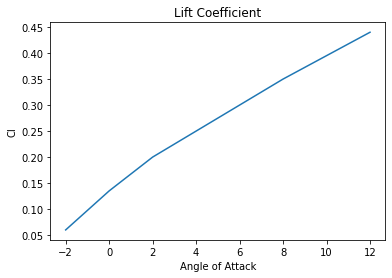

In [24]:
import matplotlib.pyplot as plt

plt.plot(C_l_alpha,C_l_y)
plt.xlabel("Angle of Attack")
plt.ylabel("Cl")
plt.title("Lift Coefficient")
plt.show()

This curve is not very exciting, but it is what Walt used in his program. The key thing here is how easy it was to generate a useful graph! Walt drew all of his graphs by hand!

deals with sets of numbers representing some kind of scientific data. Most likely, these numbers are samples of what might be some unknown mathematical function we are trying to understand. In our aeronautical work here we started off with a figure showing the lift coefficient as a function of angle of attact. With a little help from *WebAppDigitizer*, we generated a set of data points that represented the curve we saw in the figure, and we want to generate a *Python* function we can use to find the value of $C_l$ for any input angle of attack $\alpha$. This kind of problem happens frequently in the research world, and **numpy** was developed to help.

Lets work through this example using the data points for the lift coefficient. For simplicity,have two set of points representing the lift/drag  coefficients over a range of angles of attack. The sample values were obtained from Walter Erbach's program, and we want to use those data points to find the values for $C_l/C_d$ any chosen value of $\alpha$ we need.

The input values are stored initially in a simple *Python* list of $\alpha-value$ pairs. 

In [26]:
C_l = [
    (-2,0.06),
    (0,0.135),
    (2,0.20),
    (4,0.25),
    (6,0.30),
    (8,0.35),
    (10,0.395),
    (12,0.440)
]

C_d = [
    (-2.0, 0.008),
    (0.0, 0.009),
    (2.0, 0.010),
    (4.0, 0.012),
    (6.0, 0.014),
    (8.0, 0.019),
    (10.0, 0.024),
    (12.0, 0.0335)
]

This data is in the form of a list of  **X-Y** point pairs. Python has a simple way to extract the **X** and **Y** values into separate lists. This is called a *list comprehension*:

In [27]:
C_l_xp = [x[0] for x in C_l]
C_l_yp = [x[1]for x in C_l]
C_d_xp = [x[0] for x in C_d]
C_d_yp = [x[1]for x in C_d]

We can see the results here:

In [28]:
C_l_xp

[-2, 0, 2, 4, 6, 8, 10, 12]

In [29]:
C_l_yp

[0.06, 0.135, 0.2, 0.25, 0.3, 0.35, 0.395, 0.44]

Let's plot these lists using **matplotlib**

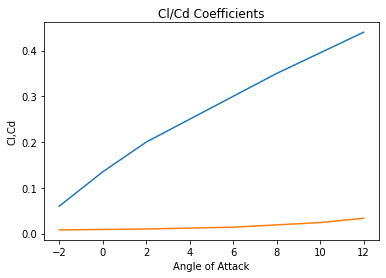

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(C_l_xp,C_l_yp)
plt.plot(C_d_xp,C_d_yp)
plt.xlabel("Angle of Attack")
plt.ylabel("Cl,Cd")
plt.title("Cl/Cd Coefficients")
plt.show()


This is hard to work with, so let's re-plot the drag curve and show the scale for that curve in the right:

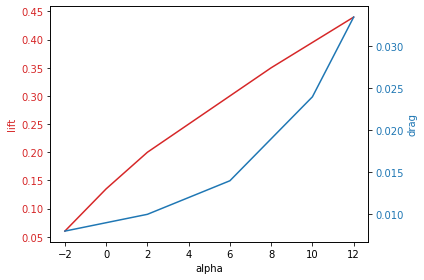

In [32]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.array(C_l_xp)
lift = np.array(C_l_yp)
drag = np.array(C_d_yp)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('alpha')
ax1.set_ylabel('lift', color=color)
ax1.plot(alpha, lift, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('drag', color=color)
ax2.plot(alpha, drag, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Thisis much better. However,the curves are pretty "choppy", since the plot is made up of  straight lines between the small number of points we had available. We know that is no right, so wereally wantto"fit" a smooth curve through those points. We can do this using anumber of schemes found in the **scipy** package. The process we will use returns a *Python* function we can use to get values for any input $\alpha$ we need.

In [34]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [35]:
    order = 1
    CL = InterpolatedUnivariateSpline(alpha, C_l_yp, k=order)
    CD = InterpolatedUnivariateSpline(alpha, C_d_yp, k=order)

We now have two functions, **CL** and **CD** we cna use to easily get values for input angles. What is cool is that we can even ask for values beyond the range of the original data we used.

Lets test this by generating a new set of values to plot.We will generate angles from -5 to _15 using **numpy**: 

In [40]:
angles = np.arange(-5, 16, 2)
angles

array([-5, -3, -1,  1,  3,  5,  7,  9, 11, 13, 15])

The last parameter told **numpy** how often we wanted sample values. I had to make the end value greater than the last value I wanted to make sure it was included. Experimenting solves problems like this!

Now,let's generate our new data points, hopefully smoother!

In [46]:
fitted_C_l = CL(angles)
fitted_C_d = CD(angles)
fitted_C_l

array([-0.0525,  0.0225,  0.0975,  0.1675,  0.225 ,  0.275 ,  0.325 ,
        0.3725,  0.4175,  0.4625,  0.5075])

**numpy** applies our coefficient function to an *array* of points, generating a new *array* of results. SImple, and powerful!

Now for the new plot:

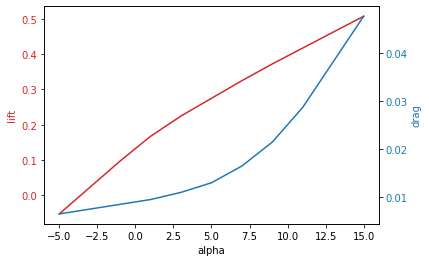

In [48]:
fig2, ax3 = plt.subplots()

color = 'tab:red'
ax3.set_xlabel('alpha')
ax3.set_ylabel('lift', color=color)
ax3.plot(angles, fitted_C_l, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax4.set_ylabel('drag', color=color)  # we already handled the x-label with ax1
ax4.plot(angles, fitted_C_d, color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Much smoother. We could make the plot even better by sampling at more angles.

The great thing about this system is that we can do complex mathematical operations on the data. For example, it is common to see graphs showing the ratio of $C_l$ to $C_d$ over a range of angles. Here is an example:

In [49]:
ClCd = fitted_C_l / fitted_C_d

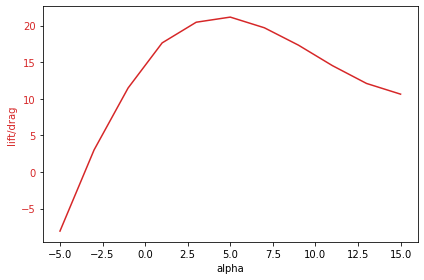

In [51]:
fig2, ax5 = plt.subplots()

color = 'tab:red'
ax5.set_xlabel('alpha')
ax5.set_ylabel('lift/drag', color=color)
ax5.plot(angles, ClCd, color=color)
ax5.tick_params(axis='y', labelcolor=color)
fig2.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

As designers, we are interested in the flight angle of attack where we get the most lift and minimum drag. This is the highest point on the curve above. Can we figure out where that point is? 

We have a new set of points for this curve. We can get a new spline function for these:

In [58]:
CLCD = InterpolatedUnivariateSpline(angles, ClCd, k=order)
CLCD(5)

array(21.15384615)

In [59]:
knots = CLCD.get_knots()
knots

array([-5., -3., -1.,  1.,  3.,  5.,  7.,  9., 11., 13., 15.])

In [60]:
for a, b in zip(knots[:-1], knots[1:]):
    print(a,b)

-5.0 -3.0
-3.0 -1.0
-1.0 1.0
1.0 3.0
3.0 5.0
5.0 7.0
7.0 9.0
9.0 11.0
11.0 13.0
13.0 15.0


This loop looks at the set of intervals where the spline polynomials were created to give us values in each interval. 

Now, let's calculate the values of our cure in each interval, and at a point half way between the ends:

In [62]:
for a, b in zip(knots[:-1], knots[1:]):
    u, v, w = CLCD(a), CLCD((a+b)/2), CLCD(b)
    print(u,v,w)

-8.076923076923077 -2.538461538461539 2.9999999999999987
2.9999999999999987 7.235294117647058 11.470588235294118
11.470588235294118 14.55108359133127 17.63157894736842
17.63157894736842 19.04306220095694 20.454545454545457
20.454545454545457 20.804195804195807 21.153846153846153
21.153846153846153 20.425407925407924 19.696969696969692
19.696969696969692 18.511275546159265 17.325581395348838
17.325581395348838 15.92366026289181 14.521739130434781
14.521739130434781 13.306621199204319 12.091503267973854
12.091503267973854 11.359887759641378 10.628272251308902


The spline polynomial through these three points looks like this:

$$
a +b x + c x^2 + d x^3
$$

We are interested in the slope (derivative) of this function so we can find the point where the slope is zero. The derivative of our polynomial is:

$$
b + 2 c x + 3 d x^2
$$

We can ask **sympy** to help us find where the slope is z

In [53]:
def quadratic_spline_roots(spl):
    roots = []
    knots = spl.get_knots()
    for a, b in zip(knots[:-1], knots[1:]):
        u, v, w = spl(a), spl((a+b)/2), spl(b)
        t = np.roots([u+w-2*v, w-u, 2*v])
        t = t[np.isreal(t) & (np.abs(t) <= 1)]
        roots.extend(t*(b-a)/2 + (b+a)/2)
    return np.array(roots)

There is some interesting trickery going on here. Line 3 delivers the knots of the splines used the input spline function we are working with. Line 4 starts a loop that looks at the groups of three points n the set of knots. This function calculates the slope of a line between two adjacent data points. IT checks to make sure that slop is not too 

In [54]:
from scipy.interpolate import InterpolatedUnivariateSpline
f = InterpolatedUnivariateSpline(angles, ClCd, k=3)
cr_pts = quadratic_spline_roots(f.derivative())
cr_pts = np.append(cr_pts, (angles[0], angles[-1]))  # also check the endpoints of the interval
cr_vals = f(cr_pts)
min_index = np.argmin(cr_vals)
max_index = np.argmax(cr_vals)
print("Maximum value {} at {}\nMinimum value {} at {}".format(cr_vals[max_index], cr_pts[max_index], cr_vals[min_index], cr_pts[min_index]))

Maximum value 21.19277604145857 at 4.653289061150352
Minimum value -8.076923076923078 at -5.0


In [ ]:
Ignoringthevalue for theminimumvalue, we see that ourmax $C_l/C_d& is 21 at an angleof asttskof 465 degrees. This is the angle we want to fly at to get maximum duration for a model using this airfoil!